### Comparing COCO Results from Detectron2 Models
In this notebook we will compare the model trained before by the coco metrics which is different MAPs.

In [1]:
import numpy as np
import os

# Setup detectron2 logger
from detectron2.utils.logger import setup_logger
setup_logger()


# checking the version and if we have cuda available
from src.segmentation.framework_handlers.detectron2_handler import print_version_info

!nvcc --version
print_version_info()

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Aug_15_21:14:11_PDT_2021
Cuda compilation tools, release 11.4, V11.4.120
Build cuda_11.4.r11.4/compiler.30300941_0
torch:  1.9 ; cuda:  11.1
detectron2: 0.6


In [2]:
# define the time of the training
from datetime import datetime

# Get the current date and time of the model training process
current_time = datetime.now().strftime("%d-%m-%Y_%H-%M-%S")

print(f"current time {current_time}")

current time 07-05-2024_17-43-25


In [3]:
from src.segmentation.framework_handlers.detectron2_handler import prepare_and_register_datasets

dataset_name_train = "etaylor/cannabis_patches_train_26-04-2024_15-44-44"
dataset_name_test = "etaylor/cannabis_patches_test_26-04-2024_15-44-44"
release_train = "v0.1"
release_test = "v0.1"
detectron2_models_path = "/home/etaylor/code_projects/thesis/checkpoints/detectron2"

metadata_train, dataset_dicts_train, metadata_test, dataset_dicts_test = prepare_and_register_datasets(dataset_name_train, dataset_name_test, release_train, release_test)

Initializing dataset...
Preloading all samples. This may take a while...


100%|██████████| 395/395 [00:01<00:00, 382.78it/s]


Initialized dataset with 395 images.
Exporting dataset. This may take a while...


  4%|▍         | 15/395 [00:00<00:11, 33.24it/s]Skipping instance with 0 labeled pixels: IMG_0048_p7.png, instance_id: 15, category_id: 1
Skipping instance with 0 labeled pixels: IMG_0048_p8.png, instance_id: 9, category_id: 2
100%|██████████| 395/395 [00:10<00:00, 36.61it/s]


Exported to ./export_coco-instance_etaylor_cannabis_patches_train_26-04-2024_15-44-44_v0.1.json. Images in segments/etaylor_cannabis_patches_train_26-04-2024_15-44-44/v0.1
Initializing dataset...
Preloading all samples. This may take a while...


100%|██████████| 108/108 [00:00<00:00, 377.83it/s]


Initialized dataset with 108 images.
Exporting dataset. This may take a while...


100%|██████████| 108/108 [00:02<00:00, 37.28it/s]


Exported to ./export_coco-instance_etaylor_cannabis_patches_test_26-04-2024_15-44-44_v0.1.json. Images in segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/v0.1
WARNING [05/07 17:43:45 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/07 17:43:45 d2.data.datasets.coco]: Loaded 369 images in COCO format from segments/etaylor_cannabis_patches_train_26-04-2024_15-44-44/annotations/export_coco-instance_etaylor_cannabis_patches_train_26-04-2024_15-44-44_v0.1.json
WARNING [05/07 17:43:46 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/07 17:43:46 d2.data.datasets.coco]: Loaded 106 images in COCO format from segments/etaylor_cannabis_patches_test_26-04-2024_15-44-44/annotations/export_coco-instance_etaylor_cannabis_patches_test_26-04-2024_15-44-44_v0.1.json


Define the model configurations

In [4]:
detectron2_checkpoints_path = "/home/etaylor/code_projects/thesis/checkpoints/detectron2"

# coco detection models
detection_models = {
    "faster_rcnn_R_50_C4_1x": {
        "config": f"{detectron2_checkpoints_path}/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/config.yaml",
        "checkpoint": f"{detectron2_checkpoints_path}/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/model_final.pth", 
        "eval_results": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_C4_1x/29-04-2024_16-09-41/cannabis_patches_test_26-04-2024_15-44-44/evaluation_results.json"
    },
    "faster_rcnn_R_50_DC5_1x": {
        "config": f"{detectron2_checkpoints_path}/COCO-Detection/faster_rcnn_R_50_DC5_1x/29-04-2024_16-09-55/config.yaml",
        "checkpoint": f"{detectron2_checkpoints_path}/COCO-Detection/faster_rcnn_R_50_DC5_1x/29-04-2024_16-09-55/model_final.pth", 
        "eval_results": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_50_DC5_1x/29-04-2024_16-09-55/cannabis_patches_test_26-04-2024_15-44-44/evaluation_results.json"

    },
    "faster_rcnn_R_101_C4_3x": {
        "config": f"{detectron2_checkpoints_path}/COCO-Detection/faster_rcnn_R_101_C4_3x/03-05-2024_21-43-08/config.yaml",
        "checkpoint": f"{detectron2_checkpoints_path}/COCO-Detection/faster_rcnn_R_101_C4_3x/03-05-2024_21-43-08/model_final.pth",
        "eval_results": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_101_C4_3x/03-05-2024_21-43-08/cannabis_patches_test_26-04-2024_15-44-44/evaluation_results.json"
    },
    "faster_rcnn_R_101_DC5_3x": {
        "config": f"{detectron2_checkpoints_path}/COCO-Detection/faster_rcnn_R_101_DC5_3x/03-05-2024_22-11-00/config.yaml",
        "checkpoint": f"{detectron2_checkpoints_path}/COCO-Detection/faster_rcnn_R_101_DC5_3x/03-05-2024_22-11-00/model_final.pth",
        "eval_results": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_101_DC5_3x/03-05-2024_22-11-00/cannabis_patches_test_26-04-2024_15-44-44/evaluation_results.json"
    },
    "faster_rcnn_R_101_FPN_3x": {
        "config": f"/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_101_FPN_3x/03-05-2024_20-04-22/config.yaml",
        "checkpoint": f"/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_101_FPN_3x/03-05-2024_20-04-22/model_final.pth",
        "eval_results": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_R_101_FPN_3x/03-05-2024_20-04-22/cannabis_patches_test_26-04-2024_15-44-44/evaluation_results.json"
    },
    "faster_rcnn_X_101_32x8d_FPN_3x": {
        "config": f"/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x/03-05-2024_20-40-50/config.yaml",
        "checkpoint": f"/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x/03-05-2024_20-40-50/model_final.pth",
        "eval_results": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x/03-05-2024_20-40-50/cannabis_patches_test_26-04-2024_15-44-44/evaluation_results.json"
    }, 
}

# coco instance segmentation models
instatnce_segmentation_models = {
    "mask_rcnn_R_50_FPN_3x": {
        "config": f"/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/27-04-2024_12-56-46/config.yaml",
        "checkpoint": f"/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/27-04-2024_12-56-46/model_final.pth",
        "eval_results": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/27-04-2024_12-56-46/cannabis_patches_test_26-04-2024_15-44-44/evaluation_results.json"
    },
    "mask_rcnn_R_101_C4_3x": {
        "config": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_101_C4_3x/03-05-2024_18-49-55/config.yaml",
        "checkpoint": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_101_C4_3x/03-05-2024_18-49-55/model_final.pth",
        "eval_results": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_101_C4_3x/03-05-2024_18-49-55/cannabis_patches_test_26-04-2024_15-44-44/evaluation_results.json"
    },
    "mask_rcnn_R_101_DC5_3x": {
        "config": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_101_DC5_3x/03-05-2024_22-23-10/config.yaml",
        "checkpoint": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_101_DC5_3x/03-05-2024_22-23-10/model_final.pth",
        "eval_results": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_101_DC5_3x/03-05-2024_22-23-10/cannabis_patches_test_26-04-2024_15-44-44/evaluation_results.json"
    },
    "mask_rcnn_R_101_FPN_3x": {
        "config": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x/03-05-2024_21-31-29/config.yaml",
        "checkpoint": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x/03-05-2024_21-31-29/model_final.pth",
        "eval_results": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x/03-05-2024_21-31-29/cannabis_patches_test_26-04-2024_15-44-44/evaluation_results.json"
    },
    "mask_rcnn_regnetx_4gf_dds_fpn_1x": {
        "config": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/03-05-2024_21-37-39/config.yaml",
        "checkpoint": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/03-05-2024_21-37-39/model_final.pth",
        "eval_results": "/home/etaylor/code_projects/thesis/checkpoints/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/03-05-2024_21-37-39/cannabis_patches_test_26-04-2024_15-44-44/evaluation_results.json"
    }    
}

### Collecting Metrics Results

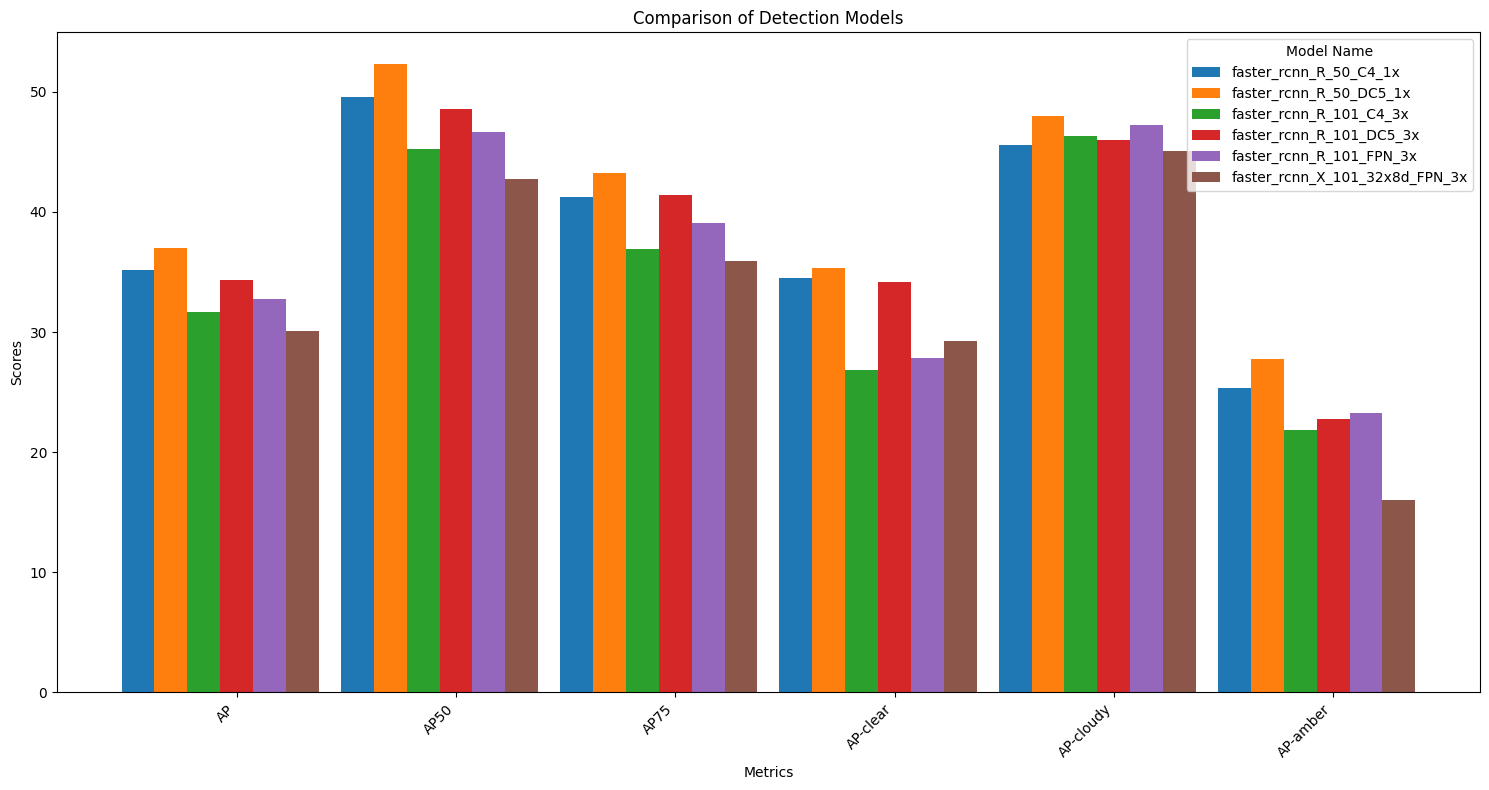

In [6]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

# Metrics to compare
metrics = ["AP", "AP50", "AP75", "AP-clear", "AP-cloudy", "AP-amber"]

# Initialize an empty dictionary to hold metrics for each model
model_metrics = {model: {metric: None for metric in metrics} for model in detection_models.keys()}

# Extract the metrics from the evaluation files
for model_name, data in detection_models.items():
    eval_file = data["eval_results"]
    if os.path.exists(eval_file):
        # Use open as a context manager, then pass the file object to json.load
        with open(eval_file, 'r') as file:
            eval_results = json.load(file)
            for metric in metrics:
                model_metrics[model_name][metric] = eval_results["bbox"].get(metric)

# Organize data for plotting
index = np.arange(len(metrics))
bar_width = 0.15
fig, ax = plt.subplots(figsize=(15, 8))

# Plot bar charts for each model
for i, (model_name, metrics_data) in enumerate(model_metrics.items()):
    values = [metrics_data[metric] for metric in metrics]
    ax.bar(index + i * bar_width, values, bar_width, label=model_name)

# Set up labels and legend
ax.set_xlabel("Metrics")
ax.set_ylabel("Scores")
ax.set_title("Comparison of Detection Models")
ax.set_xticks(index + bar_width * len(detection_models) / 2)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend(title="Model Name")

plt.tight_layout()
plt.show()

Segmentation models

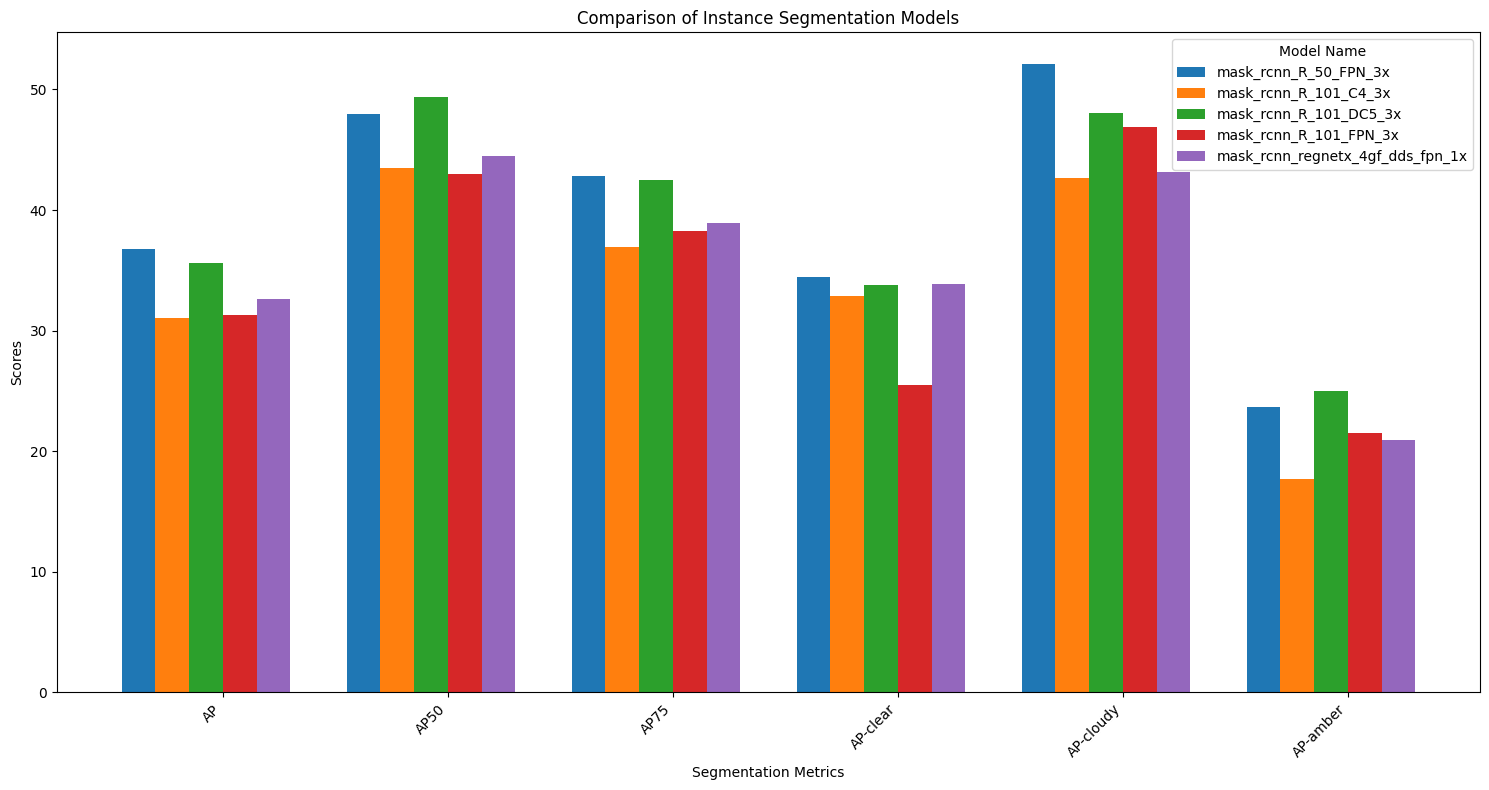

In [7]:

# Metrics to compare for instance segmentation
metrics_segm = ["AP", "AP50", "AP75", "AP-clear", "AP-cloudy", "AP-amber"]

# Initialize a dictionary to hold metrics for each model
instance_model_metrics = {model: {metric: None for metric in metrics_segm} for model in instatnce_segmentation_models.keys()}

# Extract the metrics from the evaluation files
for model_name, data in instatnce_segmentation_models.items():
    eval_file = data["eval_results"]
    if os.path.exists(eval_file):
        # Use open as a context manager, then pass the file object to json.load
        with open(eval_file, 'r') as file:
            eval_results = json.load(file)
            if "segm" in eval_results:
                for metric in metrics_segm:
                    instance_model_metrics[model_name][metric] = eval_results["segm"].get(metric)

# Organize data for plotting
index = np.arange(len(metrics_segm))
bar_width = 0.15
fig, ax = plt.subplots(figsize=(15, 8))

# Plot bar charts for each model
for i, (model_name, metrics_data) in enumerate(instance_model_metrics.items()):
    values = [metrics_data[metric] for metric in metrics_segm]
    ax.bar(index + i * bar_width, values, bar_width, label=model_name)

# Set up labels and legend
ax.set_xlabel("Segmentation Metrics")
ax.set_ylabel("Scores")
ax.set_title("Comparison of Instance Segmentation Models")
ax.set_xticks(index + bar_width * len(instatnce_segmentation_models) / 2)
ax.set_xticklabels(metrics_segm, rotation=45, ha='right')
ax.legend(title="Model Name")

plt.tight_layout()
plt.show()

Here we can run the models on the datasets in order to eval them and computer the AR (average recall)

In [ ]:
# TODO: calc more metrics